In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D5-Amelie/S3/Office_Amelie-S3.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:5760]
test_data = df.iloc[5760:]

In [5]:
len(train_data),len(test_data)

(5760, 720)

In [6]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data),12):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i:i+12, 0])
        #print(y)
   
    
    return [X, y]

In [7]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [8]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [9]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [10]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [11]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (478, 24, 1)
y_train.shape =  (478, 12)
X_test.shape =  (58, 24, 1)
y_test.shape =  (58, 12)


In [12]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [13]:
# define model
model = Sequential()
model.add(LSTM(24, activation='tanh', input_shape=(X_train.shape[1],1)))
model.add(Dense(12))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24)                2496      
                                                                 
 dense (Dense)               (None, 12)                300       
                                                                 
Total params: 2,796
Trainable params: 2,796
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="adam",loss="MSE")
model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
4/4 [==============================] - 3s 24ms/step - loss: 1373.4142
Epoch 2/300
4/4 [==============================] - 0s 19ms/step - loss: 1369.5205
Epoch 3/300
4/4 [==============================] - 0s 16ms/step - loss: 1365.4633
Epoch 4/300
4/4 [==============================] - 0s 18ms/step - loss: 1361.1859
Epoch 5/300
4/4 [==============================] - 0s 16ms/step - loss: 1356.7030
Epoch 6/300
4/4 [==============================] - 0s 17ms/step - loss: 1351.8903
Epoch 7/300
4/4 [==============================] - 0s 21ms/step - loss: 1346.6205
Epoch 8/300
4/4 [==============================] - 0s 16ms/step - loss: 1340.9095
Epoch 9/300
4/4 [==============================] - 0s 19ms/step - loss: 1334.3604
Epoch 10/300
4/4 [==============================] - 0s 18ms/step - loss: 1327.9578
Epoch 11/300
4/4 [==============================] - 0s 16ms/step - loss: 1322.1768
Epoch 12/300
4/4 [==============================] - 0s 16ms/step - loss: 1316.9017
Epoch 13/300


In [15]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt

In [17]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [18]:
print('Root Mean Squared Error for LSTM Model for training is:',rmse_train)
print('Root Mean Squared Error for LSTM Model for testing is:',rmse_test)
print('Mean Absolute Error for LSTM Model for training is:',mae_train)
print('Mean Absolute Error for LSTM Model for testing is:',mae_test)
print('MAPE for LSTM Model for training is:',mape_train)
print('MAPE for LSTM Model for testing is:',mape_test)

Root Mean Squared Error for LSTM Model for training is: 22.35312739533492
Root Mean Squared Error for LSTM Model for testing is: 26.237290226700935
Mean Absolute Error for LSTM Model for training is: 14.799007070925777
Mean Absolute Error for LSTM Model for testing is: 18.479931230216188
MAPE for LSTM Model for training is: 0.5400059035631118
MAPE for LSTM Model for testing is: 0.4266617770942862


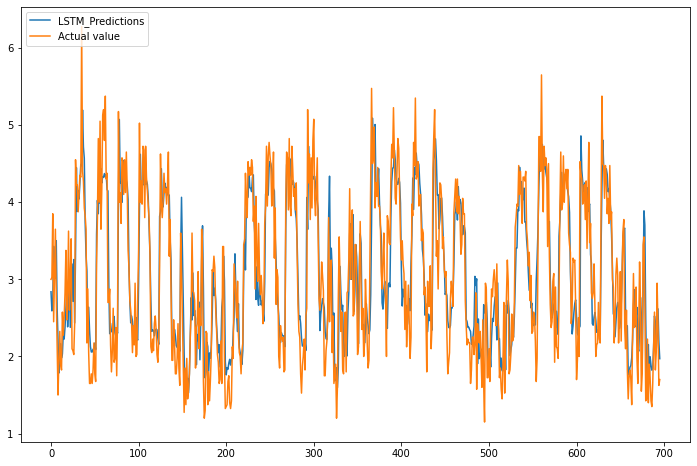

In [ ]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [ ]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([3.]), array([2.8387692], dtype=float32))

In [ ]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([0.1612308]), array([0.43433332]), array([1.13958311]), array([-0.97826076]), array([-0.09694839]), array([0.63908195]), array([-0.72628021]), array([-0.52885008]), array([-0.67833948]), array([0.16519916]), array([0.30337334]), array([-0.26512516]), array([-0.15483868]), array([0.54398823]), array([-0.02846885]), array([0.27467895]), array([0.44506955]), array([0.76317692]), array([-0.36577749]), array([0.44089174]), array([0.98509884]), array([-0.44026256]), array([0.64769602]), array([0.67236948]), array([-1.09899712]), array([-0.63883662]), array([-1.23175836]), array([-0.00929642]), array([1.21472025]), array([-0.22272682]), array([0.34500599]), array([-0.27151537]), array([0.08443069]), array([0.09111404]), array([-0.1655283]), array([1.8026123]), array([-0.79558325]), array([-0.43996048]), array([-0.64412785]), array([0.08013916]), array([0.34356117]), array([-0.93272185]), array([0.64202166]), array([-0.58894038]), array([-0.69120216]), array([-0.47876751]), array([-0.28

In [ ]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([2.13229132]), array([-1.88712764]))

In [ ]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [ ]:
len(neg),len(pos)

(366, 330)